<h1><b><center>PREPROCESAMIENTO, VISUALIZACIÓN Y CLASIFICACIÓN DE DATOS APLICADOS A LA DETECCIÓN DE ANORMALIDADES CARDÍACAS UTILIZANDO PYTHON</center></h1>

|<h2><font color='white'>-------------------------</font><b>DIEGO FERNANDO VELASCO GIRALDO||
|---|---|
| <left><font size="4">Ingeniero Electrónico y de Telecomunicaciones</font> | <center><img src="Logo_UAO3.png" width="65" height="65" /> |
| <left><font size="4">Estudiante de Maestría en Ingeniería con Énfasis en Ingeniería Electrónica</font> | <center><img src="Logo_Univalle.png" width="45" height="45" /> |
| <left><font size="4">Grupo de Investigación Percepción y Sistemas Inteligentes - Univalle</font> | <center><img src="Logo_PSI.png" width="130" height="130" /> |
| <left><i><font size="4">Correo Electrónico: diego.fernando.velasco@correounivalle.edu.co</font></i> | <center><i><font size="4">Celular: 3234777477</font></i> |    
    
<br>
<center><h4><i>Problema planteado en el curso de maestría: Minería de Datos - Universidad del Valle - Profesor: Andrés Castillo, Ph.D.</i></h4>
<br>

## CONTENIDO  
<h5><li>INTRODUCCIÓN</li>
<br>    
<li>CONJUNTO DE DATOS (DATASET)</li>
<br>  
<li>INFORMACIÓN DE LOS ATRIBUTOS</li>
    <br>  
<li>IMPORTACIÓN DE LAS LIBRERÍAS NECESARIAS</li>
    <br>  
<li>CARGA DEL DATASET</li>
    <br>  
<li>VISUALIZACIÓN DEL DATASET</li>
    <br>  
<li>ENTENDIENDO LOS DATOS</li>
    <br>  
<li>TIPOS DE ATRIBUTOS/VARIABLES</li>
    <br>  
<li>CLASIFICACIÓN DE LAS VARIABLES DEL DATASET ACTUAL</li>
    <br>  
<li>AGRUPAMIENTO DE LOS ATRIBUTOS DEPENDIENDO DE SU TIPO</li>
    <br>  
<li>CONVERSIÓN DE LAS VARIABLES A LOS TIPOS ADECUADOS</li>
    <br>  
<li>VISUALIZACIÓN VARIABLES NOMINALES</li>
    <br>  
<li>VISUALIZACIÓN VARIABLES ORDINALES</li>
    <br>  
<li>VISUALIZACIÓN VARIABLES NUMÉRICAS</li>
    <br>  
<li>VARIABLES NOMINALES A "DUMMIES"</li>
    <br>  
<li>VARIABLES ORDINALES A NUMÉRICAS</li>
    <br>  
<li>ORGANIZACIÓN Y BALANCEO DE DATOS</li>
    <br>  
<li>HISTOGRAMA POR CARACTERÍSTICA EN LAS 2 CLASES</li>
    <br>  
<li>PARTICIÓN DE DATOS: ENTRENAMIENTO - TEST</li>
    <br>  
<li>CLASIFICACIÓN CON ÁRBOL DE DECISIÓN</li>
    <br>  
<li>EVALUACIÓN DEL DESEMPEÑO</li>
    <br>  
<li>IMPORTANCIA DE LAS CARACTERÍSTICAS EN LA CLASIFICACIÓN</li>

## INTRODUCCIÓN

<center><img src="Libraries Python 1.jpg" width="600" height="600" /> </center>
<br>
<center><img src="Libraries Python 2.jpg" width="600" height="600" /> </center>
<br>
<center><img src="Libraries Python 3.jpg" width="600" height="600" /> </center>

## CONJUNTO DE DATOS (DATASET)

https://www.kaggle.com/ronitf/heart-disease-uci  

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

SUBIDO POR USUARIO KAGGLE: ronit

Acknowledgements
Creators:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

## INFORMACIÓN DE LOS ATRIBUTOS

First of all, let's check about the structure of the dataset. First information that can be extracted here is:

Dataset have 303 rows and 14 variables.

All factor variables are unlabeled.

Variables are:

age: age in years

sex: (1 = male; 0 = female)

cp: chest pain type

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

target 1 or 0

Important! Thal data dictionary provided is not correct. While values must be 3,6 or 7, values seems to be 1, 2 and 3...


Now, we need to understand the categorical variables, so the corresponding labels can be assigned.

#### Sex
0 Female

1 Male

#### cp (Chest pain)
0 Asymptomatic angina

1 Atypical angina

2 Non-angina

3 Typical angina

#### fbs: (fasting blood sugar > 120 mg/dl)
0 <= 120 mg/dl

1 >120 mg/dl

#### restecg (Resting electrocardiography results)
0 Left ventricular hypertrophy

1 Normal

2 ST-T wave abnormality

#### exang (Exercise induced angina)
1 yes

0 no

#### slope (Slope of peak exercise ST segment)
0 downsloping

1 upsloping

2 flat

#### thal (Thalium stress test result)
1 Fixed defect

2 Normal

3 Reversible defect

Important! There are 2 patients with zero values in this variable. As the information available in the link to the study does not seem to analyze this category, it will be coded as NA.

## IMPORTACIÓN DE LIBRERÍAS NECESARIAS

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from scipy import stats
import operator

## CARGA DEL DATASET

In [98]:
Data = pd.read_csv("heart.csv") 

#### VISUALIZACIÓN DATASET ORIGINAL

In [99]:
#print(Data.columns)
print(Data.shape)
Data.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [100]:
#Data.describe()

#### RENOMBRAMIENTO DE VARIABLES CON NOMBRES ENTENDIBLES

In [101]:
Data.rename(columns={'age':'Age', 'sex':'Gender', 'cp':'Chest_pain', 'trestbps':'Rest_blood_pressure_mmHg', 'chol':'Serum_cholesterol_mg/dl', 
                     'fbs':'Fasting_blood_sugar', 'restecg':'Rest_ECG_results', 'thalach':'Max_heart_rate_achieved_thal_test',
                     'exang':'Exercise_induced_angina', 'oldpeak':'ST_depression_by_exercise', 'slope':'Slope_peak_exercise_ST', 
                     'ca':'#_of_major_vessels_fluoroscopy',
                     'thal':'Thalium_stress_test_result', 'target':'Target'}, inplace=True)
Data.head()

,Age,Gender,Chest_pain,Rest_blood_pressure_mmHg,Serum_cholesterol_mg/dl,Fasting_blood_sugar,Rest_ECG_results,Max_heart_rate_achieved_thal_test,Exercise_induced_angina,ST_depression_by_exercise,Slope_peak_exercise_ST,#_of_major_vessels_fluoroscopy,Thalium_stress_test_result,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### CONVERSIÓN DE VARIABLES CATEGORICAS A CADENAS (STRING)

In [102]:
categoricalColumns = ['Gender', 'Chest_pain', 'Fasting_blood_sugar', 'Rest_ECG_results', 'Exercise_induced_angina', 'Slope_peak_exercise_ST', 'Thalium_stress_test_result', 'Target']

categoricalColValues = [['Female', 'Male'], ['Asymptomatic angina', 'Atypical angina', 'Non-angina', 'Typical angina'], ['<=120 mg/dl', '>120 mg/dl'], ['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'], 
                        ['No', 'Yes'], ['downsloping', 'upsloping', 'flat'], ['NA', 'Fixed defect', 'Normal', 'Reversible defect'],['Disease', 'No disease']] 

for i in range(len(categoricalColumns)): 
    for j in range(len(categoricalColValues[i])): 
        Data.loc[Data[categoricalColumns[i]] == j, categoricalColumns[i]] = categoricalColValues[i][j]

In [103]:
print("Data shape before: ",Data.shape)
#Eliminamos los datos faltantes (Missing Values)
Data.dropna(inplace = True)
Data.drop(Data[Data["Thalium_stress_test_result"]=="NA"].index, inplace=True)
print("Data shape after: ",Data.shape)

Data shape before:  (303, 14)
Data shape after:  (301, 14)


## VISUALIZACIÓN DEL DATASET

In [104]:
display(Data.head())
print("Data shape: ",Data.shape)

,Age,Gender,Chest_pain,Rest_blood_pressure_mmHg,Serum_cholesterol_mg/dl,Fasting_blood_sugar,Rest_ECG_results,Max_heart_rate_achieved_thal_test,Exercise_induced_angina,ST_depression_by_exercise,Slope_peak_exercise_ST,#_of_major_vessels_fluoroscopy,Thalium_stress_test_result,Target
0,63,Male,Typical angina,145,233,>120 mg/dl,Normal,150,No,2.3,downsloping,0,Fixed defect,No disease
1,37,Male,Non-angina,130,250,<=120 mg/dl,ST-T wave abnormality,187,No,3.5,downsloping,0,Normal,No disease
2,41,Female,Atypical angina,130,204,<=120 mg/dl,Normal,172,No,1.4,flat,0,Normal,No disease
3,56,Male,Atypical angina,120,236,<=120 mg/dl,ST-T wave abnormality,178,No,0.8,flat,0,Normal,No disease
4,57,Female,Asymptomatic angina,120,354,<=120 mg/dl,ST-T wave abnormality,163,Yes,0.6,flat,0,Normal,No disease


Data shape:  (301, 14)


## ENTENDIENDO LOS DATOS

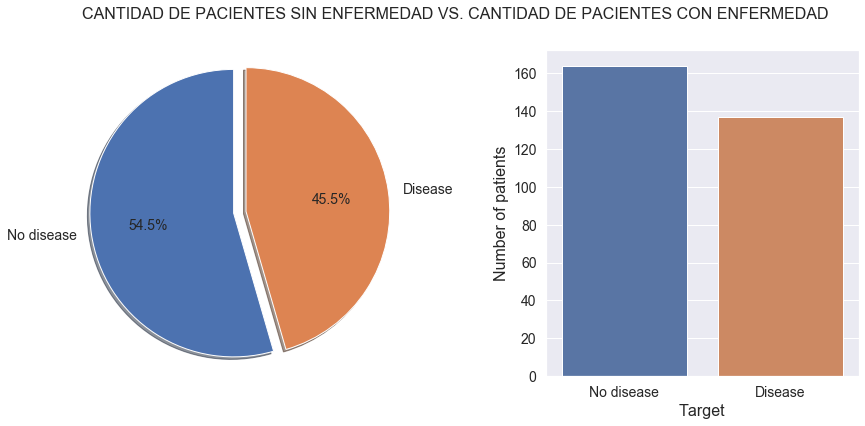

Número de pacientes SIN ENFERMEDAD 164
Número de pacientes CON ENFERMEDAD 137


In [105]:
fig = plt.figure()
fig.suptitle("CANTIDAD DE PACIENTES SIN ENFERMEDAD VS. CANTIDAD DE PACIENTES CON ENFERMEDAD", fontsize=16)

ax = fig.add_subplot(1,2,1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
Data['Target'].value_counts().plot(kind='pie', 
                                   figsize=(14, 6),
                                   autopct='%1.1f%%', # add in percentages
                                   startangle=90,     # start angle 90°
                                   shadow=True,       # add shadow  
                                   explode=[0, 0.1],
                                   fontsize=14, radius=1.15)
ax.set_ylabel('')


ax = fig.add_subplot(1,2,2)
ax = sns.countplot(x="Target", data=Data, palette=["C0", "C1"], order = Data['Target'].value_counts().index)
ax.set_xlabel("Target",fontsize=16)
ax.set_ylabel("Number of patients",fontsize=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
# plt.grid(False)
plt.show()


number_of_no_disease = sum(targ == 'No disease' for targ in Data.Target)
print("Número de pacientes SIN ENFERMEDAD",number_of_no_disease)
number_of_disease = sum(targ == 'Disease' for targ in Data.Target)
print("Número de pacientes CON ENFERMEDAD",number_of_disease)

#### -------------------------------------------------¡DATASET DESBALANCEADO!-------------------------------------------------

## TIPOS DE ATRIBUTOS/VARIABLES

<center><img src="TiposVariables2.jpg" width="800" height="800" /> </center>


## CLASIFICACIÓN DE LAS VARIABLES DEL DATASET ACTUAL

- **Age**: *Age in years* -> Numérica -> Razón -> Cuantitativa Discreta (En este caso) -> INT ---Podría ser Intervalo---

- **Gender**: *Female or male* -> Categórica -> Nominal -> NOM(Bin)

- **Chest_pain**: *Chest pain type (typical angina, atypical angina, non-angina, or asymptomatic angina)* -> Categórica -> Ordinal -> ORD

- **Rest_blood_pressure(mmHg)**: *Resting blood pressure (mm Hg)* -> Numérica -> Razón -> Cuantitativa Continua -> INT

- **Serum_cholesterol(mg/dl)**: *Serum cholesterol (mg/dl)* -> Numérica -> Razón -> Cuantitativa Continua -> INT

- **Fasting_blood_sugar**: *Fasting blood sugar (< 120 mg/dl or > 120 mg/dl)* -> Categórica -> Nominal -> ORD(Bin)

- **Rest_ECG_results**: *Resting electrocardiography results (normal, ST-T wave abnormality, or left ventricular hypertrophy)* -> Categórica -> Nominal -> NOM

- **Max_heart_rate_achieved_thal_test**: *Max. heart rate achieved during thalium stress test* -> Numérica -> Razón -> Cuantitativa Continua -> INT

- **Exercise_induced_angina**: *Exercise induced angina (yes or no)* -> Categórica -> Nominal -> NOM(Bin)

- **ST_depression_by_exercise**: ST depression induced by exercise relative to rest: -> Numérica -> Razón -> Cuantitativa Continua -> FLOAT

- **Slope_peak_exercise_ST**: *Slope of peak exercise ST segment (upsloping, flat, or downsloping)* -> Categórica -> Ordinal -> ORD

- **#_of_major_vessels_fluoroscopy**: *Number of major vessels colored by fluoroscopy* -> Numérica -> Razón -> Cuantitativa Discreta -> INT

- **Thalium_stress_test_result**: *Thalium stress test result (normal, fixed defect, or reversible defect)* -> Categórica -> Nominal -> NOM

- **Target**: *Target (maybe the most important feature) 0 = disease, 1 = no disease* -> Categórica -> Nominal -> NOM(Bin)

## AGRUPAMIENTO DE LOS ATRIBUTOS DEPENDIENDO DE SU TIPO

In [106]:
nominalColumns = ["Gender", "Chest_pain", "Rest_ECG_results", "Exercise_induced_angina", "Thalium_stress_test_result"]

ordinalColumns = ["Fasting_blood_sugar", "Slope_peak_exercise_ST"]

numericColumns = ["Age", "Rest_blood_pressure_mmHg", "Serum_cholesterol_mg/dl", "Max_heart_rate_achieved_thal_test", 
                  "ST_depression_by_exercise", "#_of_major_vessels_fluoroscopy"]

## CONVERSIÓN DE LAS VARIABLES A LOS TIPOS ADECUADOS

In [107]:
from pandas.api.types import CategoricalDtype

# Convert numeric attributes
for col in numericColumns:
    Data[col] = pd.to_numeric(Data[col], errors='coerce')
    
# loop to change each column to nominal type
for col in nominalColumns:
    cat_type = CategoricalDtype(categories = None, ordered = False)
    Data[col] = Data[col].astype(dtype = cat_type)

# Convert to levels / Ordinals
ordColumnsValues = {ordinalColumns[0]:['<=120 mg/dl', '>120 mg/dl'], ordinalColumns[1]:['downsloping', 'flat', 'upsloping']}
for col in ordinalColumns:
    cat_type = CategoricalDtype(categories = ordColumnsValues[col], ordered = True)
    Data[col] = Data[col].astype(dtype = cat_type)

    
# Delete unnecessary columns from the dataframe:
# There aren't in this dataset

## VISUALIZACIÓN VARIABLES NOMINALES

####  Gráfico de barras de frecuencias para variables nominales:
##### - Permite visualizar las frecuencias relativas o absolutas para cada valor de la variable nominal. 
##### - No confundir con un histograma. 
##### - Es más fácil de interpretar si se grafica ordenando del más frecuente al menos frecuente.


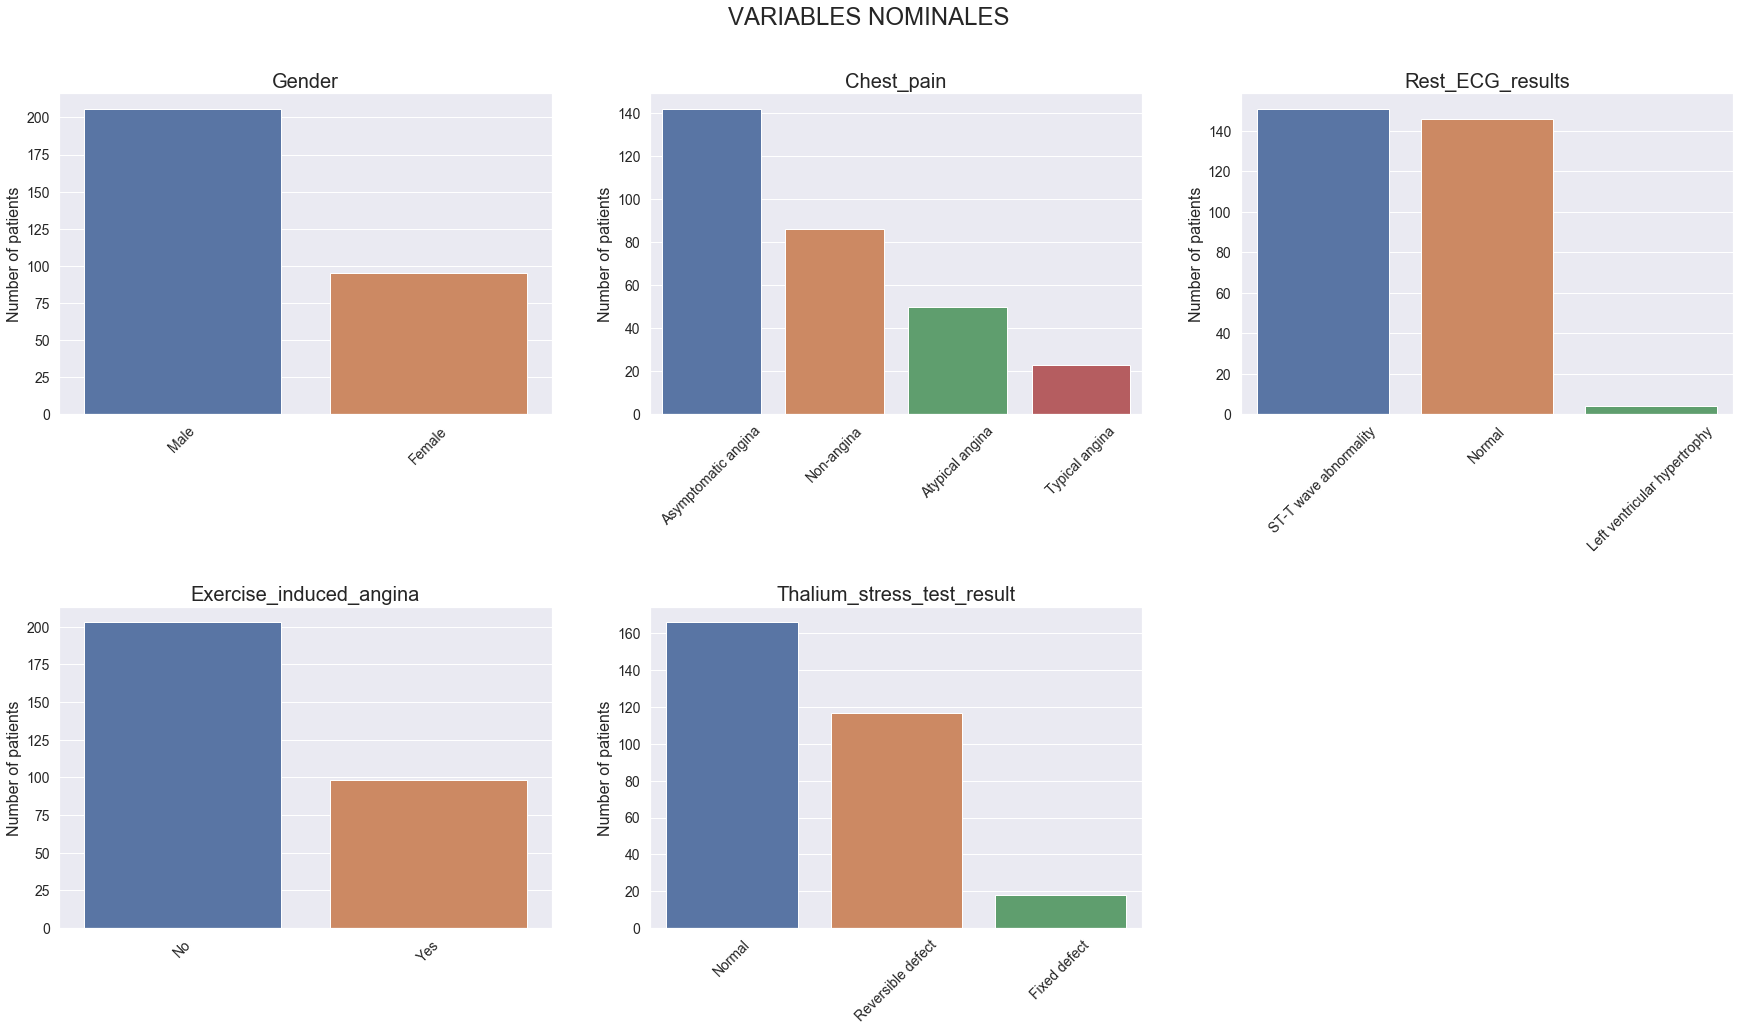

In [108]:
sns.set()

#Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(30,40))
fig.suptitle("VARIABLES NOMINALES", fontsize=24)
fig.subplots_adjust(top=0.95, hspace = 0.6)

i=1
for nominalVariable in nominalColumns: 
    plt.subplot(5,3,i).set_title(nominalVariable, fontsize=20)
    ax = sns.countplot(nominalVariable, data=Data, order = Data[nominalVariable].value_counts().index)
    ax.set_xlabel("")
    ax.set_xlabel("")
    ax.set_ylabel("Number of patients", fontsize=16)
    plt.xticks(size = 14, rotation=45)
    plt.yticks(size = 14)
    i += 1
    
plt.show()

## VISUALIZACIÓN VARIABLES ORDINALES

### Gráfico de barras de frecuencias para variables ordinales:
##### - Permite visualizar las frecuencias relativas o absolutas para cada valor de la variable ordinal. 
##### - Es más fácil de interpretar si se grafica respetando el orden de la variable ordinal.

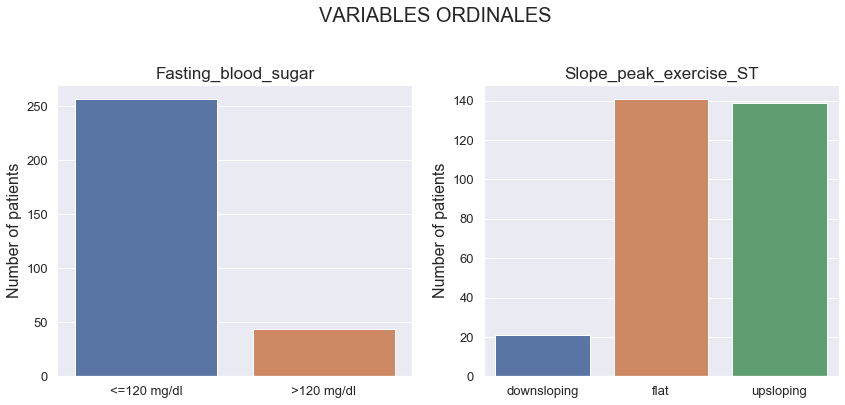

In [109]:
#Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(14,6))
fig.suptitle("VARIABLES ORDINALES", fontsize=20)
fig.subplots_adjust(top=0.8, hspace = 0.9)

i=1
for ordinalVariable in ordinalColumns: 
    plt.subplot(1,2,i).set_title(ordinalVariable, fontsize=17)
    ax = sns.countplot(ordinalVariable, data=Data) 
    ax.set_xlabel("")
    ax.set_xlabel("")
    ax.set_ylabel("Number of patients", fontsize=16)
    plt.xticks(size = 13, rotation=0)
    plt.yticks(size = 13)
    i += 1
    
plt.show()

## VISUALIZACIÓN VARIABLES NUMÉRICAS

### Histogramas:
##### - Utilizado para mostrar la distribución de las variables.
##### - No confundir con un diagrama de barras. El diagrama de barras es utilizado para comparar.
##### - Es importante elegir un buen número de cajas
##### - Nos da pistas sobre la distribución de los datos

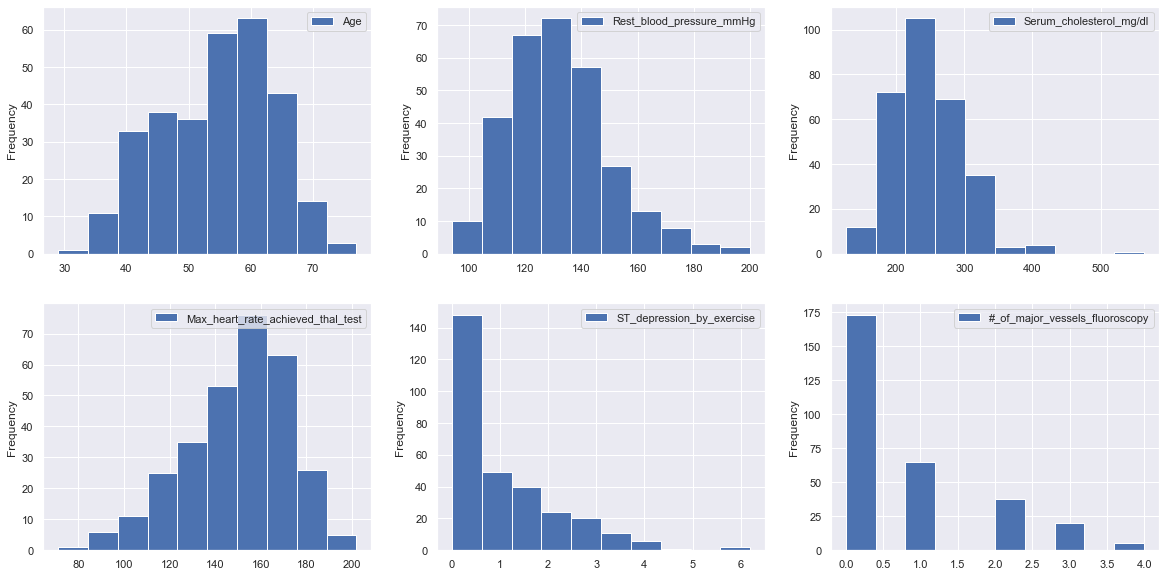

In [110]:
fig = plt.figure(figsize=(20, 10))

x = 1
# Declarando las graficas de tipo Histograma Variables Númericas
for numericVariable in numericColumns:
    ax = fig.add_subplot(2,3,x)
    Data[[numericVariable]].plot(kind='hist', ax=ax, rwidth=1)
    x = x + 1
    
plt.show()

## VARIABLES NOMINALES A "DUMMIES"

In [111]:
for nominalVariable in nominalColumns:
    dummies = pd.get_dummies(Data[nominalVariable], prefix = nominalVariable)
    Data = pd.concat([Data.drop(nominalVariable, axis = 1), dummies], axis = 1)
Data.head()

,Age,Rest_blood_pressure_mmHg,Serum_cholesterol_mg/dl,Fasting_blood_sugar,Max_heart_rate_achieved_thal_test,ST_depression_by_exercise,Slope_peak_exercise_ST,#_of_major_vessels_fluoroscopy,Target,Gender_Female,...,Chest_pain_Non-angina,Chest_pain_Typical angina,Rest_ECG_results_Left ventricular hypertrophy,Rest_ECG_results_Normal,Rest_ECG_results_ST-T wave abnormality,Exercise_induced_angina_No,Exercise_induced_angina_Yes,Thalium_stress_test_result_Fixed defect,Thalium_stress_test_result_Normal,Thalium_stress_test_result_Reversible defect
0,63,145,233,>120 mg/dl,150,2.3,downsloping,0,No disease,0,...,0,1,0,1,0,1,0,1,0,0
1,37,130,250,<=120 mg/dl,187,3.5,downsloping,0,No disease,0,...,1,0,0,0,1,1,0,0,1,0
2,41,130,204,<=120 mg/dl,172,1.4,flat,0,No disease,1,...,0,0,0,1,0,1,0,0,1,0
3,56,120,236,<=120 mg/dl,178,0.8,flat,0,No disease,0,...,0,0,0,0,1,1,0,0,1,0
4,57,120,354,<=120 mg/dl,163,0.6,flat,0,No disease,1,...,0,0,0,0,1,0,1,0,1,0


## VARIABLES ORDINALES A NUMÉRICAS
#### El clasificador que se implementará es el árbol de decisión, este no es un método basado en distancias, por lo cual, el valor numérico para las variables ordinales es adecuado.

In [112]:
#ordColumnsValues = [['<=120 mg/dl', '>120 mg/dl'], ['downsloping', 'flat', 'upsloping']]
for ordinalVariable in ordinalColumns: 
    Data[ordinalVariable] = Data[ordinalVariable].cat.codes

Data.head()

,Age,Rest_blood_pressure_mmHg,Serum_cholesterol_mg/dl,Fasting_blood_sugar,Max_heart_rate_achieved_thal_test,ST_depression_by_exercise,Slope_peak_exercise_ST,#_of_major_vessels_fluoroscopy,Target,Gender_Female,...,Chest_pain_Non-angina,Chest_pain_Typical angina,Rest_ECG_results_Left ventricular hypertrophy,Rest_ECG_results_Normal,Rest_ECG_results_ST-T wave abnormality,Exercise_induced_angina_No,Exercise_induced_angina_Yes,Thalium_stress_test_result_Fixed defect,Thalium_stress_test_result_Normal,Thalium_stress_test_result_Reversible defect
0,63,145,233,1,150,2.3,0,0,No disease,0,...,0,1,0,1,0,1,0,1,0,0
1,37,130,250,0,187,3.5,0,0,No disease,0,...,1,0,0,0,1,1,0,0,1,0
2,41,130,204,0,172,1.4,1,0,No disease,1,...,0,0,0,1,0,1,0,0,1,0
3,56,120,236,0,178,0.8,1,0,No disease,0,...,0,0,0,0,1,1,0,0,1,0
4,57,120,354,0,163,0.6,1,0,No disease,1,...,0,0,0,0,1,0,1,0,1,0


## ORGANIZACIÓN Y BALANCEO DE DATOS
#### Los clases están casi balanceadas, por lo que para este caso se utiliza "subsampling" para balancear las clases del dataset. (No es la única forma de hacerlo, ej: utilizar los datos eliminados para test, oversampling, etc).

In [113]:
#Sort data by label value:
# Data = Data.sort_values(by='Target')

#Split by class:
Class_0 = Data[Data.Target=='Disease']
#Class_0 = Class_0.drop('Target',axis=1)
print("Class_0 shape: ", Class_0.shape)

Class_1 = Data[Data.Target=='No disease']

#Subsampling:
Class_1 = Class_1.sample(n=137, axis=0, random_state=1)
#Class_1 = Class_1.drop('Target',axis=1)
print("Class_1 shape: ", Class_1.shape)

Data2 = pd.concat([Class_0, Class_1]) 
print("Data2 shape:    ",Data2.shape)

#Split features and labels:
Label = Data2.Target
Features = Data2.drop('Target',axis=1)

feature_columns = Features.columns

display(Class_0.head())
display(Class_1.head())
display(Data2.head())
display(Features.head())
display(Label.head())

Class_0 shape:  (137, 23)
Class_1 shape:  (137, 23)
Data2 shape:     (274, 23)


,Age,Rest_blood_pressure_mmHg,Serum_cholesterol_mg/dl,Fasting_blood_sugar,Max_heart_rate_achieved_thal_test,ST_depression_by_exercise,Slope_peak_exercise_ST,#_of_major_vessels_fluoroscopy,Target,Gender_Female,...,Chest_pain_Non-angina,Chest_pain_Typical angina,Rest_ECG_results_Left ventricular hypertrophy,Rest_ECG_results_Normal,Rest_ECG_results_ST-T wave abnormality,Exercise_induced_angina_No,Exercise_induced_angina_Yes,Thalium_stress_test_result_Fixed defect,Thalium_stress_test_result_Normal,Thalium_stress_test_result_Reversible defect
165,67,160,286,0,108,1.5,2,3,Disease,0,...,0,0,0,1,0,0,1,0,1,0
166,67,120,229,0,129,2.6,2,2,Disease,0,...,0,0,0,1,0,0,1,0,0,1
167,62,140,268,0,160,3.6,0,2,Disease,1,...,0,0,0,1,0,1,0,0,1,0
168,63,130,254,0,147,1.4,2,1,Disease,0,...,0,0,0,1,0,1,0,0,0,1
169,53,140,203,1,155,3.1,0,0,Disease,0,...,0,0,0,1,0,0,1,0,0,1


,Age,Rest_blood_pressure_mmHg,Serum_cholesterol_mg/dl,Fasting_blood_sugar,Max_heart_rate_achieved_thal_test,ST_depression_by_exercise,Slope_peak_exercise_ST,#_of_major_vessels_fluoroscopy,Target,Gender_Female,...,Chest_pain_Non-angina,Chest_pain_Typical angina,Rest_ECG_results_Left ventricular hypertrophy,Rest_ECG_results_Normal,Rest_ECG_results_ST-T wave abnormality,Exercise_induced_angina_No,Exercise_induced_angina_Yes,Thalium_stress_test_result_Fixed defect,Thalium_stress_test_result_Normal,Thalium_stress_test_result_Reversible defect
44,39,140,321,0,182,0.0,1,0,No disease,0,...,1,0,0,1,0,1,0,0,1,0
47,47,138,257,0,156,0.0,1,0,No disease,0,...,1,0,0,1,0,1,0,0,1,0
163,38,138,175,0,173,0.0,1,4,No disease,0,...,1,0,0,0,1,1,0,0,1,0
67,45,130,234,0,175,0.6,2,0,No disease,1,...,0,0,0,1,0,1,0,0,1,0
158,58,125,220,0,144,0.4,2,4,No disease,0,...,0,0,0,0,1,1,0,0,0,1


,Age,Rest_blood_pressure_mmHg,Serum_cholesterol_mg/dl,Fasting_blood_sugar,Max_heart_rate_achieved_thal_test,ST_depression_by_exercise,Slope_peak_exercise_ST,#_of_major_vessels_fluoroscopy,Target,Gender_Female,...,Chest_pain_Non-angina,Chest_pain_Typical angina,Rest_ECG_results_Left ventricular hypertrophy,Rest_ECG_results_Normal,Rest_ECG_results_ST-T wave abnormality,Exercise_induced_angina_No,Exercise_induced_angina_Yes,Thalium_stress_test_result_Fixed defect,Thalium_stress_test_result_Normal,Thalium_stress_test_result_Reversible defect
165,67,160,286,0,108,1.5,2,3,Disease,0,...,0,0,0,1,0,0,1,0,1,0
166,67,120,229,0,129,2.6,2,2,Disease,0,...,0,0,0,1,0,0,1,0,0,1
167,62,140,268,0,160,3.6,0,2,Disease,1,...,0,0,0,1,0,1,0,0,1,0
168,63,130,254,0,147,1.4,2,1,Disease,0,...,0,0,0,1,0,1,0,0,0,1
169,53,140,203,1,155,3.1,0,0,Disease,0,...,0,0,0,1,0,0,1,0,0,1


,Age,Rest_blood_pressure_mmHg,Serum_cholesterol_mg/dl,Fasting_blood_sugar,Max_heart_rate_achieved_thal_test,ST_depression_by_exercise,Slope_peak_exercise_ST,#_of_major_vessels_fluoroscopy,Gender_Female,Gender_Male,...,Chest_pain_Non-angina,Chest_pain_Typical angina,Rest_ECG_results_Left ventricular hypertrophy,Rest_ECG_results_Normal,Rest_ECG_results_ST-T wave abnormality,Exercise_induced_angina_No,Exercise_induced_angina_Yes,Thalium_stress_test_result_Fixed defect,Thalium_stress_test_result_Normal,Thalium_stress_test_result_Reversible defect
165,67,160,286,0,108,1.5,2,3,0,1,...,0,0,0,1,0,0,1,0,1,0
166,67,120,229,0,129,2.6,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1
167,62,140,268,0,160,3.6,0,2,1,0,...,0,0,0,1,0,1,0,0,1,0
168,63,130,254,0,147,1.4,2,1,0,1,...,0,0,0,1,0,1,0,0,0,1
169,53,140,203,1,155,3.1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1


165    Disease
166    Disease
167    Disease
168    Disease
169    Disease
Name: Target, dtype: object

## HISTOGRAMA POR CARACTERÍSTICA EN LAS 2 CLASES

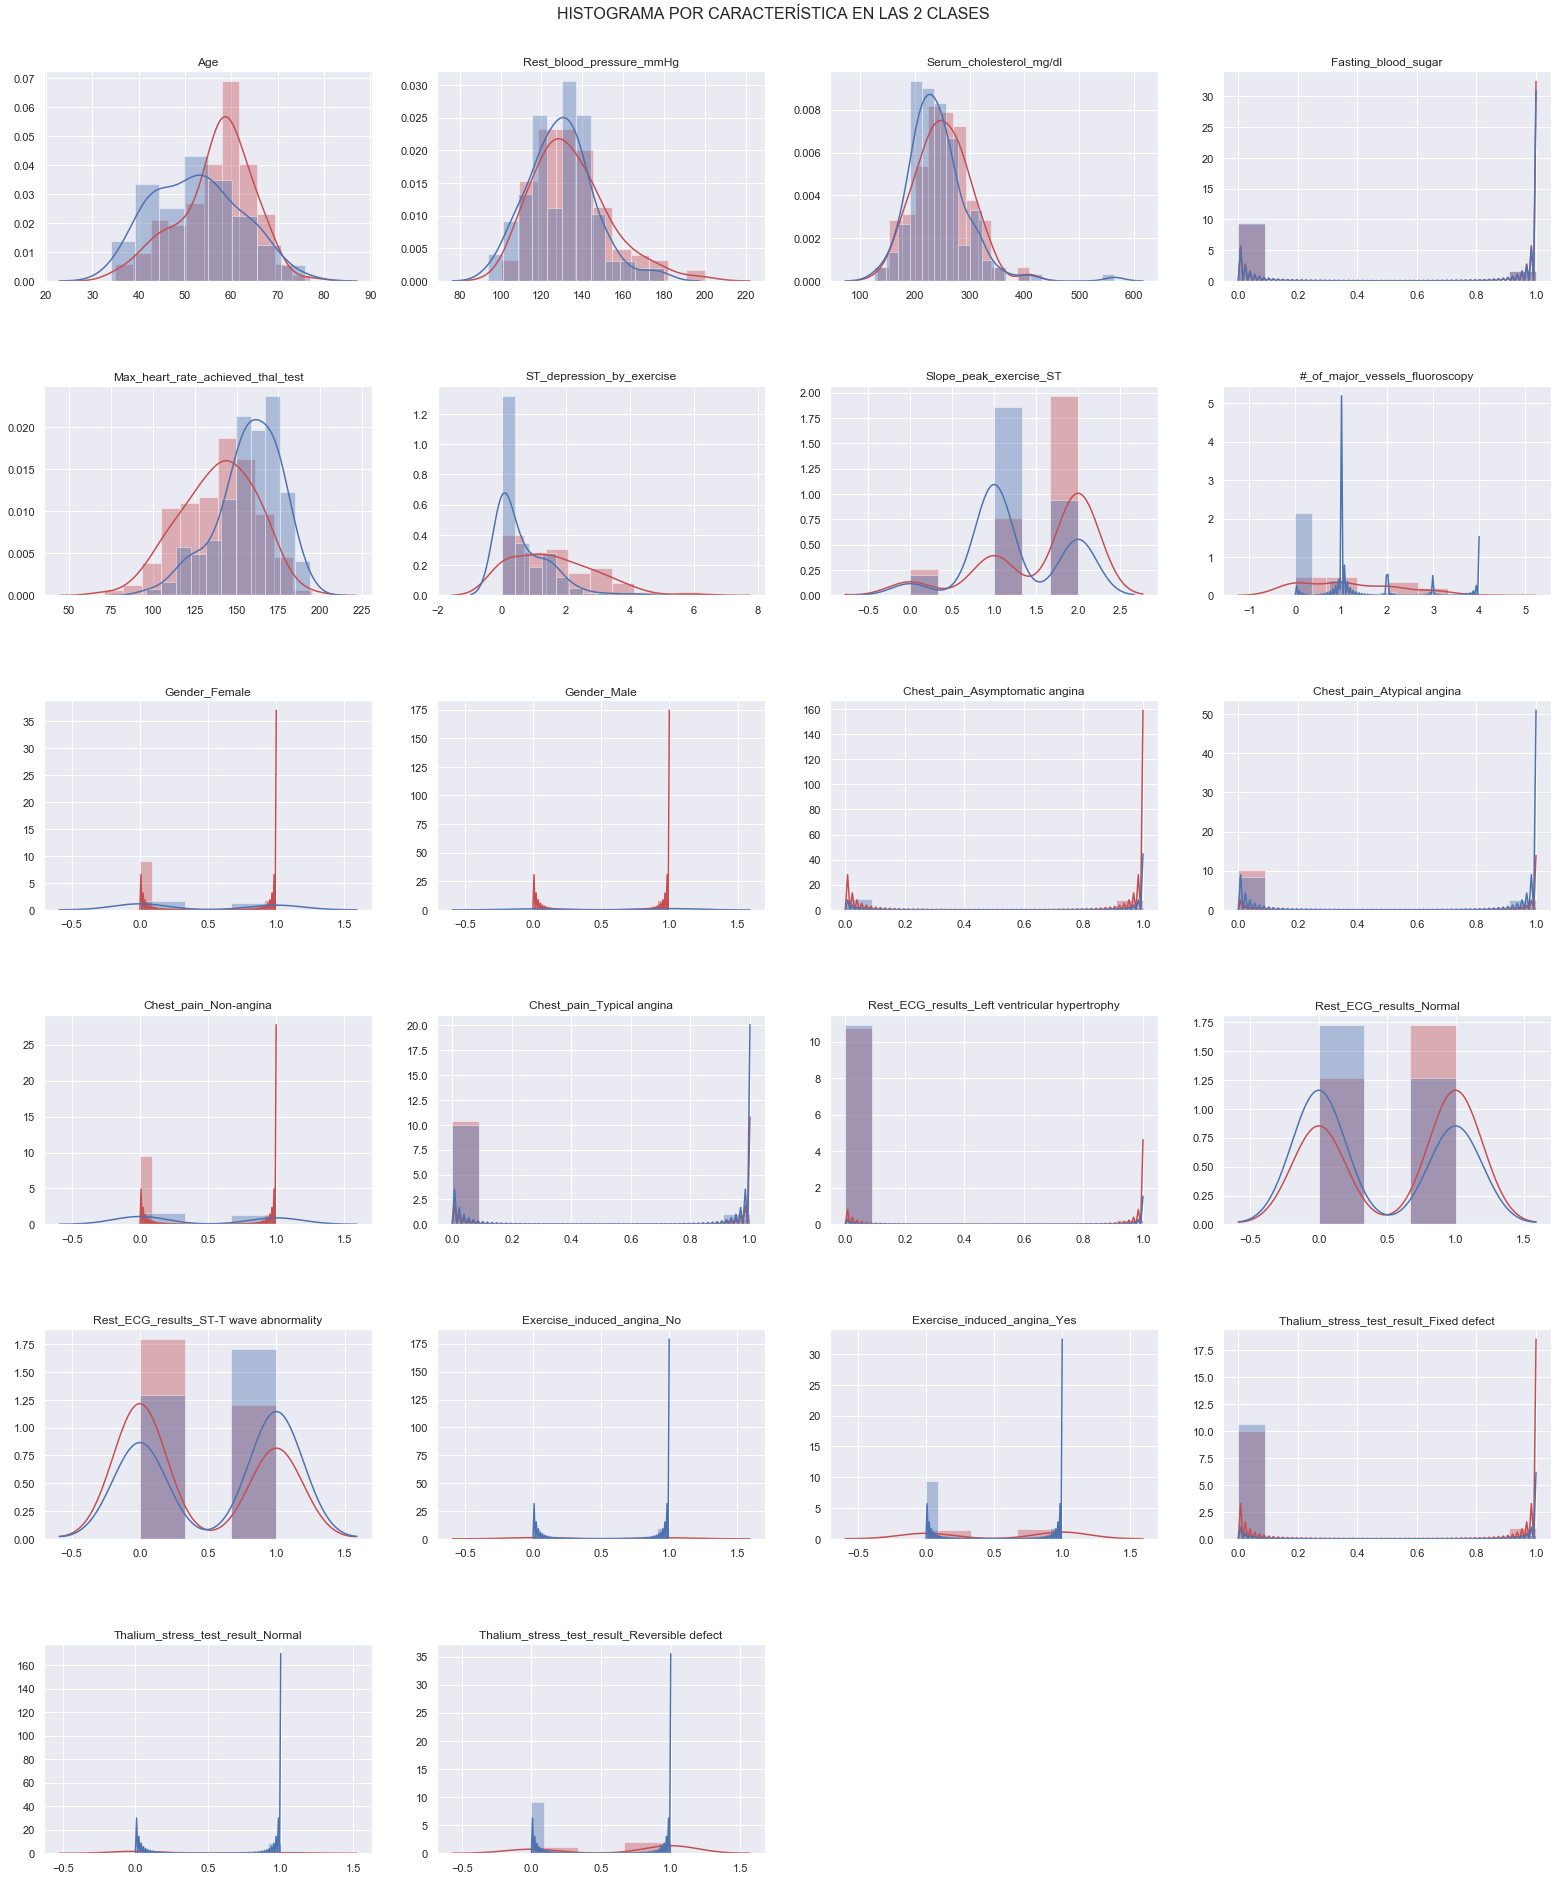

In [114]:
#Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(27,30))
fig.suptitle("HISTOGRAMA POR CARACTERÍSTICA EN LAS 2 CLASES", fontsize=16)
fig.subplots_adjust(top=0.95, hspace = 0.5)

x=1
for feature in feature_columns: 
    plt.subplot(6,4,x).set_title(feature)
    sns.distplot(Class_0[[feature]], color = 'r')
    sns.distplot(Class_1[[feature]], color = 'b')
    x = x+1
    
plt.show()

## PARTICIÓN DE DATOS: ENTRENAMIENTO - TEST

In [115]:
from sklearn.model_selection import train_test_split
# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(Features, Label, test_size = 0.25)

## CLASIFICACIÓN CON ÁRBOL DE DECISIÓN

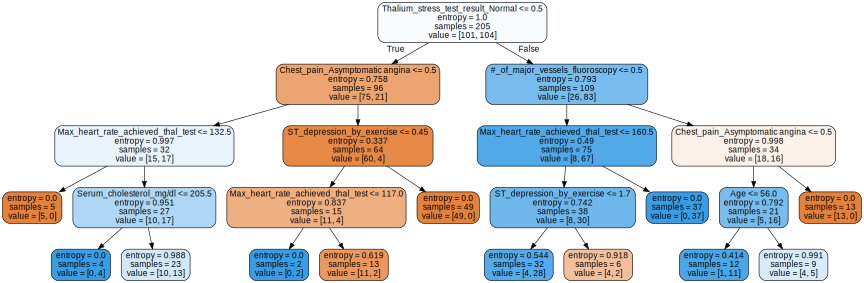

In [116]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 4, splitter='best').fit(x_train, y_train) #max_features='sqrt', 

y_out = clf.predict(x_test) #Predict class or regression value for X.

#import graphviz
from graphviz import Source
import pydotplus

dot_data = export_graphviz(clf,
                            feature_names=feature_columns,
                            out_file=None,
                            filled=True,
                            rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"12,16!"')

gvz_graph = Source(pydot_graph.to_string())

display(gvz_graph)

## EVALUACIÓN DEL DESEMPEÑO

Confusion Matrix:
 [[25 11]
 [ 7 26]]
Accuracy Score:  0.7391304347826086
Max Depth of the Tree:  4


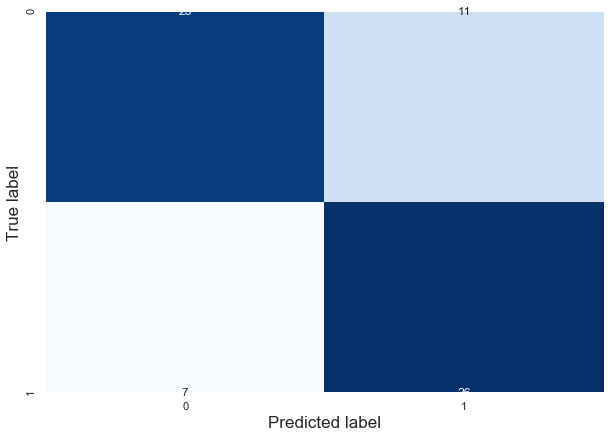

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_out) #(y_true, y_pred)
figsize = (10,7)
fig = plt.figure(figsize=figsize)
heatmap=sns.heatmap(cm, xticklabels=1, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.ylabel('True label', fontsize=17)
plt.xlabel('Predicted label', fontsize=17)
# heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='center', va='center', fontsize=16)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', va='center', fontsize=16)

print("Confusion Matrix:\n",cm)

Score = clf.score(x_test, y_test)
print("Accuracy Score: ",Score)
#Other option: print("Accuracy: ",metrics.accuracy_score(y_test, y_out))

print("Max Depth of the Tree: ",clf.max_depth)

## IMPORTANCIA DE LAS CARACTERÍSTICAS EN LA CLASIFICACIÓN CON ÁRBOL DE DECISIÓN

Number of Features:  22


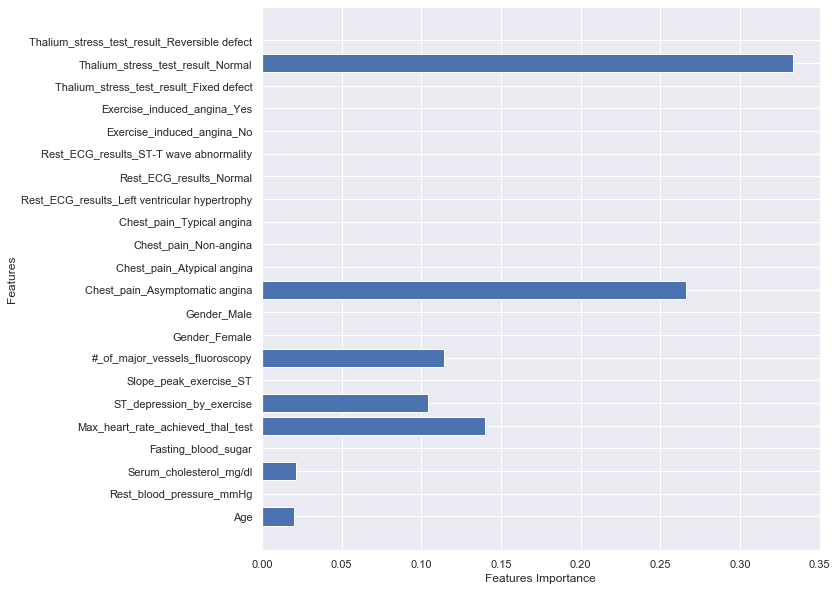

In [118]:
plt.figure(figsize=(10, 10))
caract=Features.shape[1]
print('Number of Features: ',caract)
plt.barh(range(caract),clf.feature_importances_)
plt.yticks(np.arange(caract), (feature_columns))
plt.xlabel('Features Importance')
plt.ylabel('Features')

plt.show()

## CLASIFICACIÓN CON NAIVE - BAYES

Confusion Matrix:
 [[29  7]
 [ 5 28]]
Accuracy Score:  0.8260869565217391


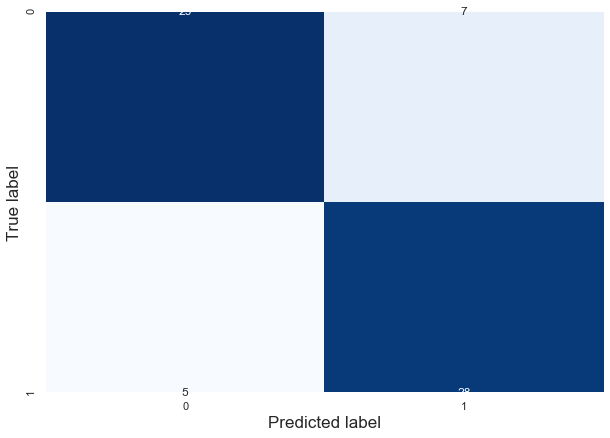

In [119]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

model = gnb.fit(x_train, y_train)
#Print the score on the train data

y_out = gnb.predict(x_test) #Predict class or regression value for X.


cm = confusion_matrix(y_test, y_out) #(y_true, y_pred)
figsize = (10,7)
fig = plt.figure(figsize=figsize)
heatmap=sns.heatmap(cm, xticklabels=1, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.ylabel('True label', fontsize=17)
plt.xlabel('Predicted label', fontsize=17)
# heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='center', va='center', fontsize=16)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', va='center', fontsize=16)

print("Confusion Matrix:\n",cm)

Score = gnb.score(x_test, y_test)
print("Accuracy Score: ",Score)
#Other option: print("Accuracy: ",metrics.accuracy_score(y_test, y_out))

<br>
<br>
<h1><center>GRACIAS POR SU ATENCIÓN</center></h1>
<h2><center>diego.fernando.velasco@correounivalle.edu.co</center></h2>
<h2><center>Celular: 3234777477</center></h2>

In [120]:
# from sklearn.metrics import roc_curve, auc
# false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_out)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# roc_auc

# max_depths = np.linspace(1, 32, 32, endpoint=True)
# train_results = []
# test_results = []

# for max_depth in max_depths:
    
#    dt = DecisionTreeClassifier(max_depth=max_depth)
#    dt.fit(x_train, y_train)
    
#    train_pred = dt.predict(x_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    # Add auc score to previous train results
#    train_results.append(roc_auc)

#    y_pred = dt.predict(x_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    # Add auc score to previous test results
#    test_results.append(roc_auc)
    
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
# line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('AUC score')
# plt.xlabel('Tree depth')
# plt.show()